In [1]:
from picamera2 import Picamera2
from libcamera import controls
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
picam2 = Picamera2()

[2:29:30.341622657] [8950]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[2:29:30.350537246] [8965]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[2:29:30.351399702] [8965]  WARN CameraSensorProperties camera_sensor_properties.cpp:286 No static properties available for 'ov9281'
[2:29:30.351408165] [8965]  WARN CameraSensorProperties camera_sensor_properties.cpp:288 Please consider updating the camera sensor properties database
[2:29:30.354536987] [8965]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov9281@60 to CFE device /dev/media0 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[2:29:30.355990934] [8950]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[2:29:30.370275783] [8967]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[2:29:30.371189704] [8967]  WARN CameraSensorProperties camera_sensor_properties.cpp:286 No static properties availab

In [3]:
picam2.sensor_modes[2]['format']

[2:29:30.397064865] [8950]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[2:29:30.399515863] [8950]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 640x400-R16
[2:29:30.399840793] [8967]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/ov9281@60 - Selected sensor format: 640x400-Y8_1X8 - Selected CFE format: 640x400-Y16 
[2:29:30.409737099] [8950]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[2:29:30.410908005] [8950]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 1280x720-R16
[2:29:30.411449716] [8967]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/ov9281@60 - Selected sensor format: 1280x720-Y8_1X8 - Selected CFE format: 1280x720-Y16 
[2:29:30.424267434] [8950]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[2:29:30.425496785] [8950]  INFO Camera camera.cpp:1183 configuring streams: (0) 640x480-XBGR8888 (1) 1280x800-

R8

In [4]:
{'format': 'R8',
 'unpacked': 'R8',
 'bit_depth': 8,
 'size': (1280, 800),
 'fps': 143.66,}

{'format': 'R8',
 'unpacked': 'R8',
 'bit_depth': 8,
 'size': (1280, 800),
 'fps': 143.66}

In [5]:
config = picam2.create_video_configuration(raw=picam2.sensor_modes[2], controls={"ExposureValue":5},sensor={'bit_depth': 8,})

picam2.configure(config)
picam2.start()
time.sleep(2)

[2:29:30.588048911] [8950]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[2:29:30.599995321] [8950]  INFO Camera camera.cpp:1183 configuring streams: (0) 1280x720-XBGR8888 (1) 1280x800-R16
[2:29:30.603244274] [8967]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/ov9281@60 - Selected sensor format: 1280x800-Y8_1X8 - Selected CFE format: 1280x800-Y16 


In [6]:
img = picam2.capture_array("raw").view(np.uint16)


In [7]:
img.shape

(800, 1280)

In [8]:
metadata = picam2.capture_metadata()
metadata

{'SensorTimestamp': 8972791023000,
 'ScalerCrop': (0, 40, 1280, 720),
 'DigitalGain': 1.0041567087173462,
 'Lux': 26.46019744873047,
 'FrameDuration': 33331,
 'SensorBlackLevels': (4096, 4096, 4096, 4096),
 'AeLocked': True,
 'AnalogueGain': 5.3125,
 'FocusFoM': 1859,
 'ExposureTime': 33300}

In [9]:
black_level = metadata["SensorBlackLevels"][0] / 2**(16 - 10)
black_level

64.0

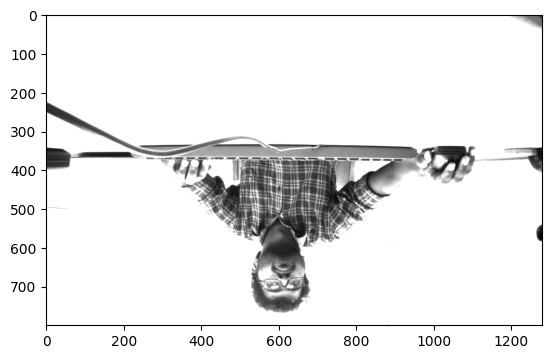

In [10]:
plt.imshow(img, cmap='gray')